In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import chi2_contingency
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
%matplotlib inline
sns.set_theme(color_codes=True,style='darkgrid',palette='deep',font='sans-serif')

In [2]:
data = pd.read_csv('loandata.csv')

In [3]:
data.head(10)

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,1,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
5,0.0,1.0,1,1.0,5417,4196.0,267.0,360.0,1.0,1,1
6,0.0,1.0,0,0.0,2333,1516.0,95.0,360.0,1.0,1,1
7,0.0,1.0,1,0.0,3036,2504.0,158.0,360.0,0.0,2,0
8,0.0,1.0,1,0.0,4006,1526.0,168.0,360.0,1.0,1,1
9,0.0,1.0,1,0.0,12841,10968.0,349.0,360.0,1.0,2,0


# Descriptive Statistic

In [4]:
data.shape

(614, 11)

In [5]:
data.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,601.000000,611.000000,614.000000,582.000000,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000,614.000000
mean,0.186356,0.651391,0.781759,0.140893,5403.459283,1621.245798,146.412162,342.00000,0.842199,1.962541,0.687296
std,0.389718,0.476920,0.413389,0.348211,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.00000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,100.000000,360.00000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,128.000000,360.00000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,168.000000,360.00000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.00000,1.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    float64
 1   Married            611 non-null    float64
 2   Education          614 non-null    int64  
 3   Self_Employed      582 non-null    float64
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         592 non-null    float64
 7   Loan_Amount_Term   600 non-null    float64
 8   Credit_History     564 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 52.9 KB


In [7]:
data.columns = data.columns.str.lower()
data.columns

Index(['gender', 'married', 'education', 'self_employed', 'applicantincome',
       'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history',
       'property_area', 'loan_status'],
      dtype='object')

In [8]:
data.isna().sum()

gender               13
married               3
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

# Missing Values Treatment

In [9]:
#Impute Null Values by "Mode"
data['gender'].mode()

0    0.0
Name: gender, dtype: float64

In [10]:
data['self_employed'].mode()

0    0.0
Name: self_employed, dtype: float64

In [11]:
data['loanamount'].mode()

0    120.0
Name: loanamount, dtype: float64

In [12]:
data['loan_amount_term'].mode()

0    360.0
Name: loan_amount_term, dtype: float64

In [13]:
data['credit_history'].mode()

0    1.0
Name: credit_history, dtype: float64

In [14]:
data.fillna(data['gender'].mode()[0], inplace=True) #[0] is used to get the first value in the Series returned by mode(). If there are several values that are equally common, this approach ensures that the first one is taken.

In [15]:
data.fillna(data['self_employed'].mode()[0], inplace=True)

In [16]:
data.fillna(data['loanamount'].mode()[0], inplace=True)

In [17]:
data.fillna(data['loan_amount_term'].mode()[0], inplace=True)

In [18]:
data.fillna(data['credit_history'].mode()[0], inplace=True)

In [19]:
data['gender'].isna().sum()

0

In [20]:
data['self_employed'].isna().sum()

0

In [21]:
data['loanamount'].isna().sum()

0

In [22]:
data['loan_amount_term'].isna().sum()

0

In [23]:
data['credit_history'].isna().sum()

0

In [24]:
#we corroborate Imputations
data.isna().sum()

gender               0
married              0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

We begin to observe that the data is not balanced

## Analyzing the new Dataset with imputed values

In [25]:
df=data.copy()
df # new DataFrame

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,1,1
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1
610,0.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1
611,0.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,0.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [26]:
df['loan_status'].value_counts(normalize=True) # we begin to observe that the data is not balanced

1    0.687296
0    0.312704
Name: loan_status, dtype: float64

In [27]:
df.describe()

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.182410,0.648208,0.781759,0.133550,5403.459283,1621.245798,141.166124,334.201954,0.773616,1.962541,0.687296
std,0.386497,0.477919,0.413389,0.340446,6109.041673,2926.248369,88.340630,82.183884,0.418832,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000,2.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,3.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,3.000000,1.000000


In [28]:
print(df['loanamount'])

0        0.0
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: loanamount, Length: 614, dtype: float64


C:\Users\BANGHO\AppData\Local\Temp\ipykernel_1128\1511020923.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['loanamount'])


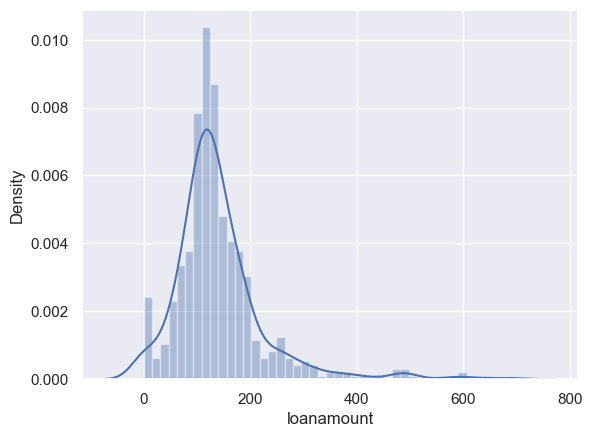

In [29]:
sns.distplot(a=df['loanamount'])
plt.show()

C:\Users\BANGHO\AppData\Local\Temp\ipykernel_1128\2735919398.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['loan_amount_term'])


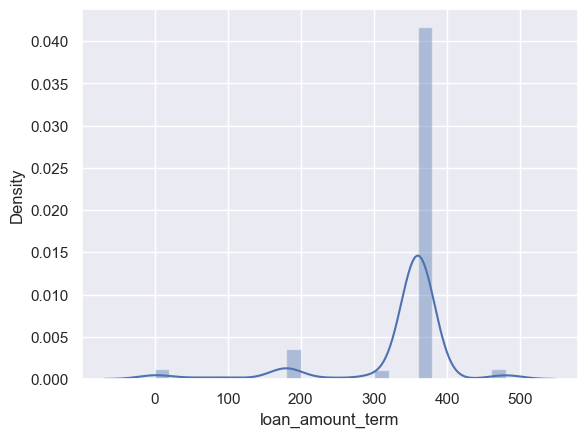

In [30]:
sns.distplot(a=df['loan_amount_term'])
plt.show()

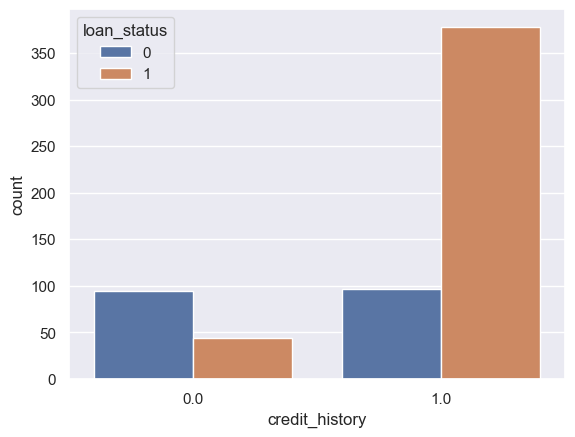

In [31]:
sns.countplot(x='credit_history', hue='loan_status',data=df);

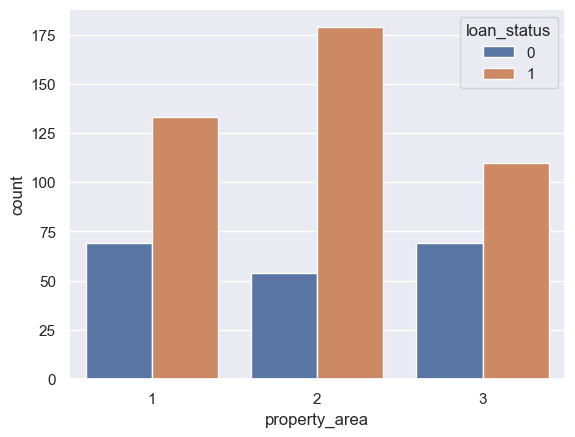

In [32]:
sns.countplot(x='property_area', hue='loan_status',data=df);

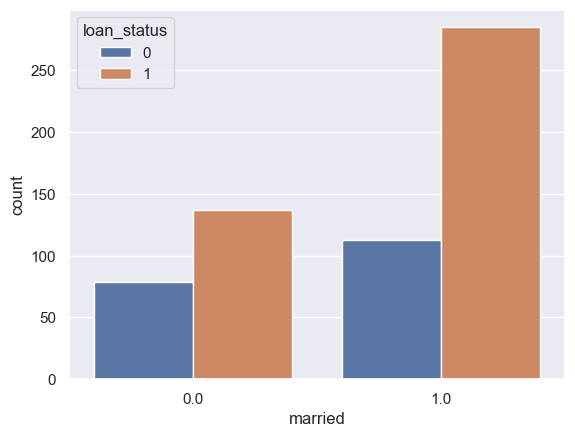

In [33]:
sns.countplot(x='married', hue='loan_status',data=df);

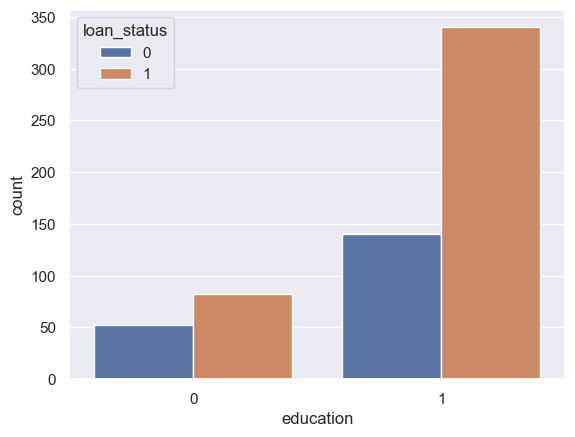

In [34]:
sns.countplot(x='education', hue='loan_status',data=df);

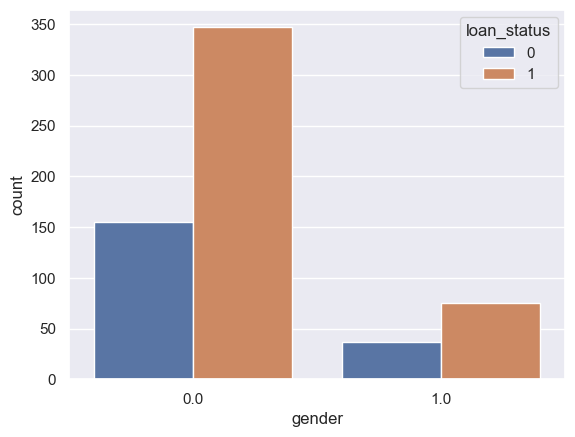

In [35]:
sns.countplot(x='gender', hue='loan_status',data=df);

C:\Users\BANGHO\AppData\Local\Temp\ipykernel_1128\2128786396.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['applicantincome'])


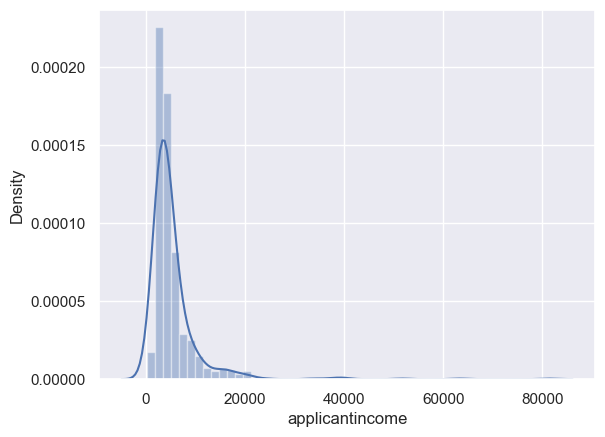

In [36]:
sns.distplot(a=df['applicantincome'])
plt.show()

C:\Users\BANGHO\AppData\Local\Temp\ipykernel_1128\4004295208.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=df['coapplicantincome'])


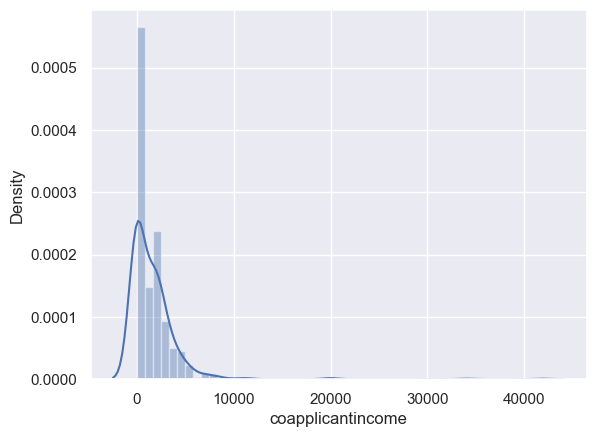

In [37]:
sns.distplot(a=df['coapplicantincome'])
plt.show()

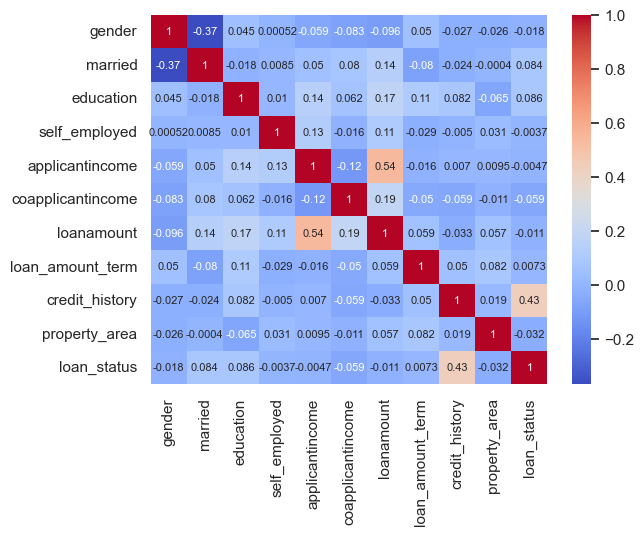

In [38]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',annot_kws={'size': 8}); # annot_kws={'size': XX} - annot size

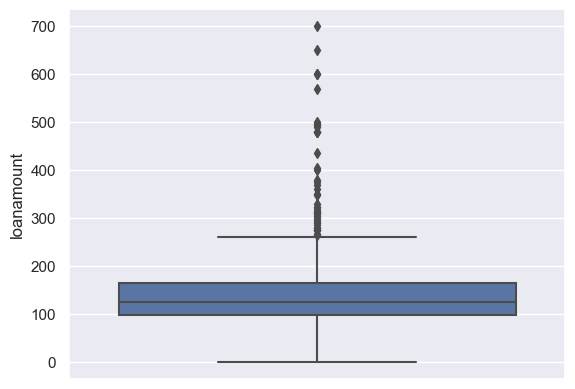

In [39]:
sns.boxplot(y='loanamount',data=df);

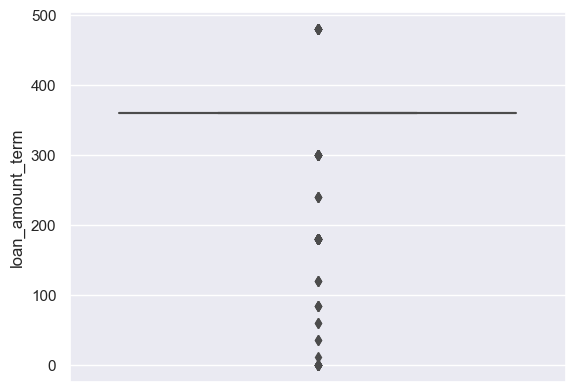

In [40]:
sns.boxplot(y='loan_amount_term',data=df);

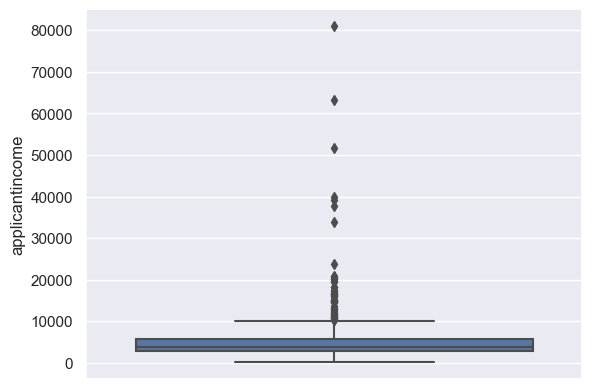

In [41]:
sns.boxplot(y='applicantincome',data=df);

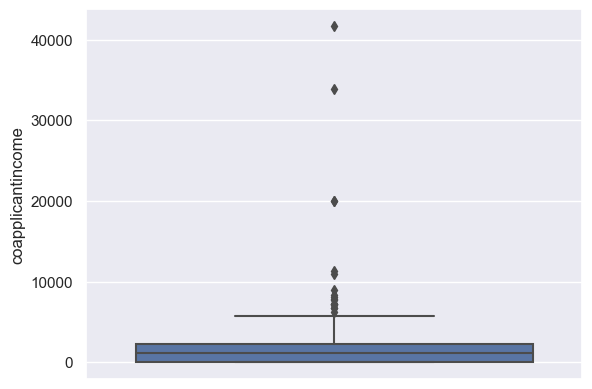

In [42]:
sns.boxplot(y='coapplicantincome',data=df);

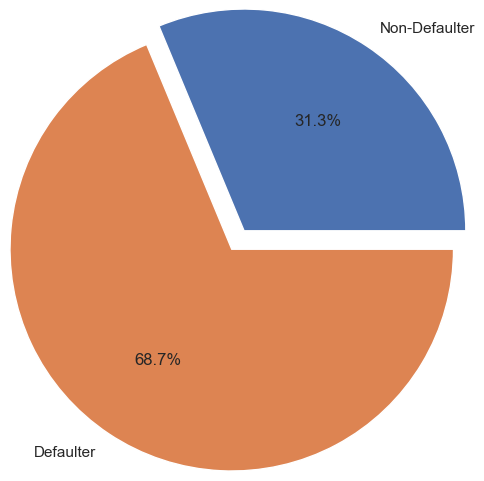

In [43]:
r=df.groupby('loan_status')['loan_status'].count()
plt.pie(r,explode=[0.05,0.1], labels=['Non-Defaulter','Defaulter'],radius=1.5, autopct='%1.1f%%')
plt.show()

#### Sumary on Data Visualization

- Class 0 represents only 31% of the data set, while class 1 represents 69%.
- The classes are highly skewed, so we need to solve this problem.
- There are outliers in the data sets. We need to scale 'applicantincome', coapplicantincome', 'loanamount' and 'loan_amount_term'.
- There is a strong correlation between 'loanamount' and 'applicantincome', as well as between 'credit_history' and 'loan_status'. 
- One or more columns can be eliminated during the selection process or through principal component analysis (PCA).
- 'gender', 'married', 'education' and 'self_employed' are dummified categorical variables, converted into binary variables (0 and 1) indicating the presence or absence of a particular category.
- We can find the relationship between the target variable and the categorical variable using the Chi-square test.

# Feature Engineering

In [44]:
def chi_square_test (df):
    stat,p,dof,expected=chi2_contingency(df) #It takes the DataFrame df as input and returns four values: stat (chi-square statistic), p (p-value), dof (degrees of freedom) and expected (expected frequencies under the null hypothesis of independence).
    alpha=0.05
    print('p value is ' + str(p))
    if p <= alpha: #We check whether the p-value is less than or equal to the defined significance level (alpha). If so, the null hypothesis is rejected and the variables are considered to be dependent.
        print('Dependent (reject HO)') #If the p-value is less than or equal to alpha, it is printed on the screen that the variables are dependent and the null hypothesis is rejected.
    else:
        print('Independent (HO holds True)') #If the p-value is greater than alpha, it is printed on the screen that the variables are independent and that the null hypothesis holds.

In [45]:
applicantincome_loan_status=pd.crosstab(df['applicantincome'],df['loan_status'])
applicantincome_loan_status

loan_status,0,1
applicantincome,,
150,1,0
210,0,1
416,1,0
645,0,1
674,0,1
...,...,...
39147,0,1
39999,0,1
51763,0,1


In [46]:
chi_square_test(applicantincome_loan_status)

p value is 0.4249440978918091
Independent (HO holds True)


In [47]:
coapplicantincome_loan_status=pd.crosstab(df['coapplicantincome'],df['loan_status'])
print(coapplicantincome_loan_status)
chi_square_test(coapplicantincome_loan_status)

loan_status         0    1
coapplicantincome         
0.000000           96  177
16.120001           0    1
189.000000          0    1
240.000000          0    1
242.000000          0    1
...                ..  ...
10968.000000        1    0
11300.000000        1    0
20000.000000        1    1
33837.000000        1    0
41667.000000        1    0

[287 rows x 2 columns]
p value is 0.5702980314497069
Independent (HO holds True)


In [48]:
loanamount_loan_status=pd.crosstab(df['loanamount'],df['loan_status'])
print(loanamount_loan_status)
chi_square_test(loanamount_loan_status)

loan_status   0   1
loanamount         
0.0          11  11
9.0           1   0
17.0          0   1
25.0          0   2
26.0          0   1
...          ..  ..
500.0         1   0
570.0         1   0
600.0         0   2
650.0         0   1
700.0         0   1

[204 rows x 2 columns]
p value is 0.43726247522055633
Independent (HO holds True)


In [49]:
loan_amount_term_loan_status=pd.crosstab(df['loan_amount_term'],df['loan_status'])
print(loan_amount_term_loan_status)
chi_square_test(loan_amount_term_loan_status)

loan_status         0    1
loan_amount_term          
0.0                 6    8
12.0                0    1
36.0                2    0
60.0                0    2
84.0                1    3
120.0               0    3
180.0              15   29
240.0               1    3
300.0               5    8
360.0             153  359
480.0               9    6
p value is 0.1379445122345727
Independent (HO holds True)


In [50]:
gender_loan_status=pd.crosstab(df['gender'],df['loan_status'])
print(gender_loan_status)
chi_square_test(gender_loan_status)

loan_status    0    1
gender               
0.0          155  347
1.0           37   75
p value is 0.7391461310869638
Independent (HO holds True)


In [51]:
married_loan_status=pd.crosstab(df['married'],df['loan_status'])
print(married_loan_status)
chi_square_test(married_loan_status)

loan_status    0    1
married              
0.0           79  137
1.0          113  285
p value is 0.04579906457828365
Dependent (reject HO)


In [52]:
education_loan_status=pd.crosstab(df['education'],df['loan_status'])
print(education_loan_status)
chi_square_test(education_loan_status)

loan_status    0    1
education            
0             52   82
1            140  340
p value is 0.04309962129357353
Dependent (reject HO)


In [53]:
self_employed_loan_status=pd.crosstab(df['self_employed'],df['loan_status'])
print(self_employed_loan_status)
chi_square_test(self_employed_loan_status)

loan_status      0    1
self_employed          
0.0            166  366
1.0             26   56
p value is 1.0
Independent (HO holds True)


In [54]:
credit_history_loan_status=pd.crosstab(df['credit_history'],df['loan_status'])
print(credit_history_loan_status)
chi_square_test(credit_history_loan_status)

loan_status      0    1
credit_history         
0.0             95   44
1.0             97  378
p value is 2.5162224058606004e-26
Dependent (reject HO)


In [55]:
property_area_loan_status=pd.crosstab(df['property_area'],df['loan_status'])
print(property_area_loan_status)
chi_square_test(property_area_loan_status)

loan_status     0    1
property_area         
1              69  133
2              54  179
3              69  110
p value is 0.0021360187811644915
Dependent (reject HO)


## Performing PCA - Principal Component Analysis on 'loanamount - applicantincome' 

In [56]:
features=['loanamount','applicantincome']
df_for_pca=df[features]
scaled_df_for_pca=(df_for_pca - df_for_pca.mean(axis=0))/df_for_pca.std()
scaled_df_for_pca

,loanamount,applicantincome
0,-1.597975,0.072931
1,-0.149038,-0.134302
2,-0.850867,-0.393427
3,-0.239597,-0.461686
4,-0.001880,0.097649
...,...,...
609,-0.794268,-0.409796
610,-1.145182,-0.212383
611,1.265939,0.436818
612,0.518831,0.356773


In [57]:
pca=PCA()
df_pca=pca.fit_transform(scaled_df_for_pca)
component_names=[f'PC{i+1}' for i in range (df_pca.shape[1])]
df_pca=pd.DataFrame(df_pca,columns=component_names)
df_pca.head()

,PC1,PC2
0,-1.078369,1.181509
1,-0.200352,0.010420
2,-0.879848,0.323459
3,-0.495882,-0.157041
4,0.067718,0.070378


In [58]:
df1=pd.concat([df,df_pca],axis=1)
df1

,gender,married,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status,PC1,PC2
0,0.0,0.0,1,0.0,5849,0.0,0.0,360.0,1.0,1,1,-1.078369,1.181509
1,0.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,3,0,-0.200352,0.010420
2,0.0,1.0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1,-0.879848,0.323459
3,0.0,1.0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1,-0.495882,-0.157041
4,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1,0.067718,0.070378
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,3,1,-0.851402,0.271863
610,0.0,1.0,1,0.0,4106,0.0,40.0,180.0,1.0,3,1,-0.959944,0.659588
611,0.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,1,1,1.204031,-0.586277
612,0.0,1.0,1,0.0,7583,0.0,187.0,360.0,1.0,1,1,0.619146,-0.114593


# Features Matrix and Vector Traget

In [59]:
X=df1.drop(['loan_status'],axis=1)
Y=df1['loan_status']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [61]:
sm=SMOTE(random_state=500) #technique is used to address class imbalance when there is a significant disparity in the distribution of target classes.
X_res,Y_res=sm.fit_resample(x_train,y_train)

# Application of ML Models

#### Now the Data is ready for implementation of machine Learning. The Target Variable is either 0 or 1.

In [62]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=500)
lr.fit(X_res,Y_res)
y_pred=lr.predict(x_test)
accuracy=lr.score(x_test,y_test)
accuracy

0.745945945945946

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.57      0.55        51
           1       0.83      0.81      0.82       134

    accuracy                           0.75       185
   macro avg       0.68      0.69      0.69       185
weighted avg       0.75      0.75      0.75       185



In [64]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.5513513513513514

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.28      0.41      0.34        51
           1       0.73      0.60      0.66       134

    accuracy                           0.55       185
   macro avg       0.51      0.51      0.50       185
weighted avg       0.61      0.55      0.57       185



In [66]:
# RANDOM FOREST Classification

from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(criterion='gini',bootstrap=True,random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.7243243243243244

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50        51
           1       0.81      0.81      0.81       134

    accuracy                           0.72       185
   macro avg       0.65      0.65      0.65       185
weighted avg       0.72      0.72      0.72       185



In [68]:
# DECISION TREE Classifier

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy',random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

0.7027027027027027

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.47      0.61      0.53        51
           1       0.83      0.74      0.78       134

    accuracy                           0.70       185
   macro avg       0.65      0.67      0.66       185
weighted avg       0.73      0.70      0.71       185



In [70]:
# XGBoost

from xgboost import XGBClassifier
model=XGBClassifier(learning_rate=0.1, n_estimators=1000,use_label_encoder=False,random_state=420)
model.fit(X_res,Y_res)
y_pred=model.predict(x_test)
accuracy=model.score(x_test,y_test)
accuracy

C:\Users\BANGHO\anaconda3\envs\loandata\Lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.745945945945946

In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.51      0.53        51
           1       0.82      0.84      0.83       134

    accuracy                           0.75       185
   macro avg       0.68      0.67      0.68       185
weighted avg       0.74      0.75      0.74       185



# CONCLUSION


## XGBoost and Logistic Regression are the most suitable models for our data set, with an accuracy of 75% both. Alternatively, random Forest and Decission Tree can also be considered, as they give an accuracy of 70-72% respectively.